<a href="https://colab.research.google.com/github/KillerStrike17/Deep-Learning-for-Vision-Using-Tensorflow-Keras/blob/master/3.%20First-Deep-Neural-Network%20with%20Kernel%20Visualization/1st_Deep_Neural_Network_with_Kernel_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [0]:
# https://keras.io/
#To install keras in notebook
#adding '!' allows bash command to run 
#in notebook
!pip install -q keras
import keras

In [0]:
#importing numpy library
import numpy as np
#importing specific modules from keras library
#the attribute lookup time is saved. 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
#importing dataset
from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
#Loading the mnist dataset and storing the data to testing
#and training variables. 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

The data is downloaded and stored in the variables

(60000, 28, 28)


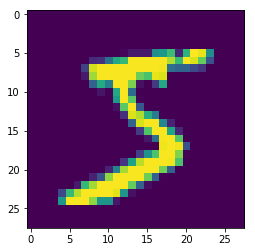

In [0]:
# Displaying the shape of the training data
print (X_train.shape)
# importint matplot library to plot graphs
from matplotlib import pyplot as plt
#inline helps in plotting graphs in notebook
%matplotlib inline
#plotting the first training data entry
plt.imshow(X_train[0])

In [0]:
#reshaping the training and testing data
#and representing in 3 dimension
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
#Change the datatype to float as later all the 
#values later will be scaled from 0 to 1
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
#The data contains pixel values ranging
#from 0-255, hence dividing all value by 255
#so that the data comes in range of 0-1
X_train /= 255
X_test /= 255

In [0]:
#displaying the first 10 values of y_train array
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
# As the total number of classes are 10
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
#Displaying the first 10 entries of Y_train variable
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

Here 10 columns in the output represents the 10 categories of the variable, and in between 

where ever there is 1, it signifies that the entry belongs to that category.

In [0]:
#importing activation
from keras.layers import Activation
#Loading the sequential model as it allows to add layers
model = Sequential()
#Adding a convolution 2d layer with activation as relu
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
#Adding a convolution 2d layer with activation as relu
model.add(Convolution2D(32, 3, 3, activation='relu'))
#Transition Block
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(32, 1, 1, activation='relu'))
#Adding a convolution 2d layer
model.add(Convolution2D(16, 3, 3, activation='relu'))
#Transition Block
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(16, 1, activation='relu'))
#Adding a Dropout layer to reduce overfitting
model.add(Dropout(0.1))
#Adding a convolution 2d layer
model.add(Convolution2D(16, 3, 3, activation='relu'))
#Adding a convolution 2d layer
model.add(Convolution2D(10, 3))
#flatten function reduces the dimension, 
#hence the 3D data will be reduced to 1D
model.add(Flatten())
# Softmax layer will divide the output between 0 and 1
# in such a way that thier summation is equal to 1
# there as here there are 10 categories, therefore the output
# will be a probability distribution
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`


In [0]:
#Display the summary of the model i.e. layers, output, parameter 
#generated
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 12, 12, 32)        1056      
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 10, 10, 16)        4624      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 5, 5, 16)          272       
__________

In [0]:
#compile function is used after the model is loaded
#it is used to give the loss function, optimizer and metrics data
#Here the loss function is categotical_crossentrophy, optimzer is adam
# and metrics is accuracy.
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
#Fit function is used to train the model, The batch size here is 32 
#meaning after a set of 32 data entries is taken at a time.
#Total epochs is 10, meaning 60000 images will be loaded 10 times 
#fully in the system. Verbose is a parameter which is set for displaying the output
#at every iteration.
model.fit(X_train, Y_train, batch_size=1200, nb_epoch=200, verbose=1)

Epoch 1/200
 3600/60000 [>.............................] - ETA: 2s - loss: 0.0850 - acc: 0.9772

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 2s 32us/step - loss: 0.0846 - acc: 0.9744
Epoch 2/200
60000/60000 [==============================] - 2s 31us/step - loss: 0.0771 - acc: 0.9767
Epoch 3/200
60000/60000 [==============================] - 2s 31us/step - loss: 0.0698 - acc: 0.9789
Epoch 4/200
60000/60000 [==============================] - 2s 31us/step - loss: 0.0649 - acc: 0.9798
Epoch 5/200
60000/60000 [==============================] - 2s 31us/step - loss: 0.0603 - acc: 0.9808
Epoch 6/200
60000/60000 [==============================] - 2s 31us/step - loss: 0.0594 - acc: 0.9814
Epoch 7/200
60000/60000 [==============================] - 2s 31us/step - loss: 0.0561 - acc: 0.9828
Epoch 8/200
60000/60000 [==============================] - 2s 31us/step - loss: 0.0517 - acc: 0.9839
Epoch 9/200
60000/60000 [==============================] - 2s 31us/step - loss: 0.0493 - acc: 0.9848
Epoch 10/200
60000/60000 [==============================] - 2s 31us/step - loss: 0.0464 - acc: 0.9858
E

In [0]:
#model.evaluate will return the loss and accuracy obtained
#over the testing data
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)# will display the value stored in variable score

In [0]:
#Trained model is run over the testing data
#and the predicted output in stored in y_pred 
#variable.
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])#Will display the values predicted by the system
print(y_test[:9])#Will display the actual values

[[1.5762947e-17 1.3701093e-10 9.7683461e-09 7.8536438e-08 4.6606939e-17
  6.0803875e-12 1.3299767e-27 9.9999988e-01 1.7645975e-11 1.3394395e-08]
 [4.3305790e-09 4.4790557e-08 1.0000000e+00 2.2601490e-09 2.2391336e-12
  1.2611617e-14 2.0258031e-09 2.7520809e-12 5.8554245e-11 3.3223872e-15]
 [3.7809418e-13 9.9999893e-01 1.5636913e-07 1.0158925e-10 1.3640528e-07
  1.1321833e-08 1.6434129e-12 7.3796832e-07 6.3588665e-08 2.8834959e-10]
 [1.0000000e+00 1.0037242e-19 1.1344001e-12 6.1177361e-14 4.5383964e-14
  3.7914841e-12 5.0492009e-08 2.5225809e-13 1.5656266e-11 5.8746515e-08]
 [2.3488895e-15 1.8938449e-14 2.3990052e-13 6.2572801e-19 9.9999976e-01
  7.1990124e-18 6.3756617e-14 4.8330599e-14 1.5703628e-12 2.8619829e-07]
 [4.5406254e-13 9.9999845e-01 6.7897808e-08 1.2292008e-11 1.4015681e-07
  1.8636415e-11 4.9913767e-12 1.2334183e-06 5.2108728e-08 3.5958980e-10]
 [8.8706926e-25 4.6154291e-12 2.4422440e-15 2.5568209e-18 9.9999964e-01
  3.9070093e-14 1.9152844e-18 6.0491334e-11 1.4628256e-09 

In [0]:
#creating a dictionary of layer name and layer that the model has in layer_dict
#variable.
layer_dict = dict([(layer.name, layer) for layer in model.layers])

This will visualize the input image and applied filter over the image

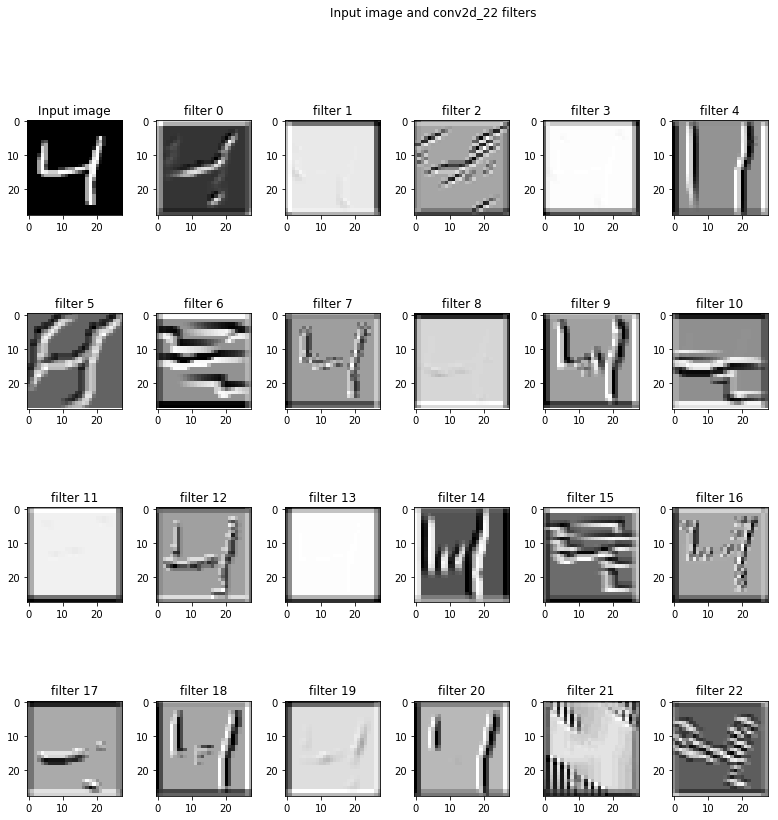

In [0]:
from keras import backend as K
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_22'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()
